In [2]:


# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [3]:


# Set random seed for reproducibility
np.random.seed(42)

# Step 3: Load the Dataset
dataset_path = 'cropyield_df.csv'
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset file not found at {dataset_path}.")

df = pd.read_csv(dataset_path)
print("Dataset loaded successfully.")
display(df.head())  # Display the first few rows

Dataset loaded successfully.


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


Dataset shape after cleaning: (28242, 8)


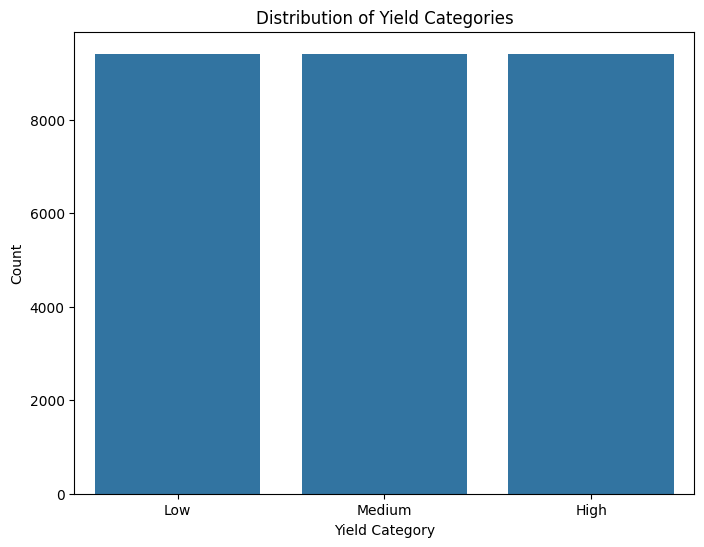

In [4]:
# Step 4: Dataset Cleaning
df = df.dropna()  # Remove rows with missing values
df = df.drop_duplicates()  # Remove duplicate rows
print(f"Dataset shape after cleaning: {df.shape}")

# Step 5: Feature Engineering
# One-hot encode categorical variables
X = pd.get_dummies(df[['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']],
                   columns=['Area', 'Item'], drop_first=True)

# Define target and categorize yield into Low, Medium, High using terciles
y = df['hg/ha_yield']
y_categories = pd.qcut(y, q=3, labels=['Low', 'Medium', 'High'])

# Visualize the distribution of yield categories
plt.figure(figsize=(8, 6))
sns.countplot(x=y_categories)
plt.title("Distribution of Yield Categories")
plt.xlabel("Yield Category")
plt.ylabel("Count")
plt.show()

In [6]:

# Step 6: Split the Data into Train and Test Sets
# Split: 80% for training, 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y_categories, test_size=0.2, random_state=42)

# Print the shapes of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Step 7: Save the Splits to Files
os.makedirs("data/train", exist_ok=True)
os.makedirs("data/test", exist_ok=True)

# Save the training set
train_data = pd.concat([X_train, y_train.rename('yield_category')], axis=1)
train_data.to_csv("data/train/cropyield_train.csv", index=False)
print("Training set saved as 'data/train/cropyield_train.csv'")

# Save the test set
test_data = pd.concat([X_test, y_test.rename('yield_category')], axis=1)
test_data.to_csv("data/test/cropyield_test.csv", index=False)
print("Test set saved as 'data/test/cropyield_test.csv'")

# Step 8: Display Samples from the Splits
print("\nSample from Training Set:")
display(train_data.head())

print("\nSample from Test Set:")
display(test_data.head())

Training set shape: (22593, 113)
Test set shape: (5649, 113)
Training set saved as 'data/train/cropyield_train.csv'
Test set saved as 'data/test/cropyield_test.csv'

Sample from Training Set:


,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,...,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams,yield_category
5493,2005,1604.0,829.59,25.36,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,Low
10969,1992,1083.0,70791.00,25.91,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,Low
2001,1997,1292.0,484.59,25.81,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Medium
22157,1997,494.0,16936.00,23.76,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,High
311,2005,1010.0,40.00,24.41,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,Medium



Sample from Test Set:


,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,...,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams,yield_category
25564,2008,636.0,40719.00,17.21,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,Medium
18113,1996,1513.0,152.01,19.71,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,Low
25607,2010,636.0,39043.00,16.51,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,Medium
6815,2007,3240.0,82439.06,27.45,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,High
18144,2000,1513.0,130.46,19.65,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,Medium
